# Detectability 

Next let’s create a random collection of possible LISA sources in order to assess their detectability.



In [14]:
from GravitationalWaves import source, utils, visualization
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [15]:
# create a random collection of sources
n_values = 1500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.normal(8, 1.5, n_values) * u.kpc
f_orb = 10**(-5 * np.random.power(3, n_values)) * u.Hz
ecc = 1 - np.random.power(5, n_values)

We can instantiate a Source class using these random sources in order to analyse the population. This Source class has many methods for calculating strains, visualising populations and more.

In [16]:
sources = source.Source(m_1=m_1, m_2=m_2, ecc=ecc, dist=dist, f_orb=f_orb)

Therefore, let’s calculate the SNR for these sources. We set verbose=True to give an impression of what sort of sources we have created. This function will split the sources based on whether they are stationary/evolving and circular/eccentric and use one of 4 SNR functions for each subpopulation.

In [9]:
snr = sources.get_snr(verbose=True)

Calculating SNR for 1500 sources
	0 sources have already merged
	1389 sources are stationary
		402 sources are stationary and circular
		987 sources are stationary and eccentric
	111 sources are evolving
		26 sources are evolving and circular
		85 sources are evolving and eccentric


These SNR values are now stored in sources.snr and we can mask those that don’t meet some detectable threshold.

In [10]:
detectable_threshold = 7
detectable_sources = sources.snr > 7
print("{} of the {} sources are detectable".format(len(sources.snr[detectable_sources]), n_values))

592 of the 1500 sources are detectable


And just like that we know the number of detectable sources! It could be interesting to see how the SNR varies with orbital frequency so let’s use the legwork.source.Source.plot_source_variables() to create a 2D density distribution of these variables.

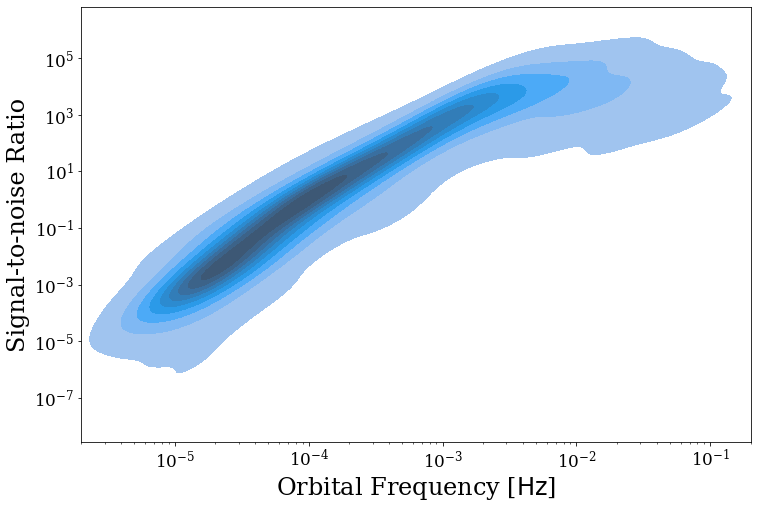

In [11]:
fig, ax = sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True),
                                        fill=True, xlim=(2e-6, 2e-1), which_sources=sources.snr > 0)

The reason for this shape may not be immediately obvious. However, if we also use the visualisation module to overlay the LISA sensitivity curve, it becomes clear that the SNRs increase in step with the decrease in the noise and flatten out as the sensitivity curve does as we would expect.

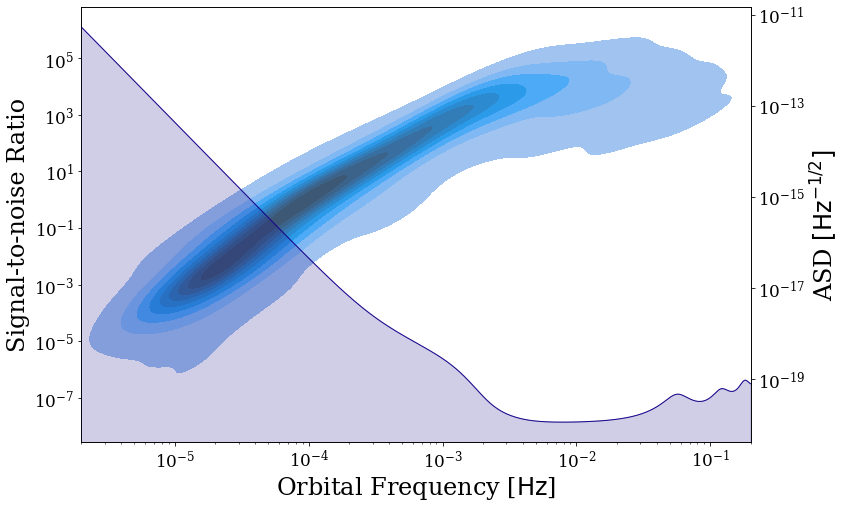

In [12]:
# create the same plot but set `show=False`
fig, ax = sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True),
                                        fill=True, show=False, which_sources=sources.snr > 0)

# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
visualization.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

plt.show()

Here’s we can see that the distribution is shifted to higher frequencies for detectable binaries which makes sense since these are easier to detect.